In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data from CSV files ###

In [6]:
Listings = pd.read_csv('Listings.csv',encoding='unicode_escape',low_memory=False)
Reviews = pd.read_csv('Reviews.csv',encoding='unicode_escape')

In [4]:
Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


### Clean Data ###

In [7]:
#Check for datatype and null values
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [8]:
#Chage datatype of date column
Listings['host_since'] = pd.to_datetime(Listings['host_since'])

In [9]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [14]:
#get desired fields 
Paris_Listings = Listings.loc[Listings['city'] == 'Paris',['host_since','neighbourhood','city','accommodates','price']]

In [15]:
Paris_Listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [17]:
Paris_Listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [23]:
Paris_Listings.query('accommodates == 0').count()
Paris_Listings.query('accommodates == 0')

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [19]:
Paris_Listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

### Prepare Data for Visualization

#### 1. Avg Price by Neighbourhood in Paris ####

In [30]:
paris_listings_neighbourhood = Paris_Listings.groupby(Paris_Listings['neighbourhood']).agg({'price':'mean'}).sort_values('price').reset_index()

In [31]:
paris_listings_neighbourhood.head()

,neighbourhood,price
0,Menilmontant,74.942257
1,Buttes-Chaumont,82.690182
2,Buttes-Montmartre,87.209479
3,Reuilly,89.058402
4,Popincourt,90.559459


In [32]:
paris_listings_neighbourhood.tail()

,neighbourhood,price
15,Luxembourg,155.638639
16,Palais-Bourbon,156.856578
17,Passy,161.144635
18,Louvre,175.379972
19,Elysee,210.536765


#### 2. Avg Price by 'Accomodates' in the most expensive neighbourhood in Paris ####

In [43]:
#Step 1: Identify the most expensive neighbourhood
expensive_neighbourhood = paris_listings_neighbourhood['neighbourhood'].iloc[-1]
expensive_neighbourhood

In [47]:
#Step 2: Avg Price by 'Accomodates' in the most expensive neighbourhood
paris_listings_accomodations = (Paris_Listings.query("neighbourhood == @expensive_neighbourhood")
                                              .groupby(Paris_Listings['accommodates'])
                                              .agg({'price':'mean'})
                                              .sort_values('price')
                                              .reset_index()
                               )

In [130]:
paris_listings_accomodations.head()

,accommodates,price
0,0,0.000000
1,1,79.522222
2,3,152.828767
3,2,155.103352
4,4,212.096070


In [49]:
paris_listings_accomodations.tail()

,accommodates,price
11,12,529.625
12,16,800.000
13,11,805.000
14,13,842.500
15,14,971.000


#### 3. Avg Price and No of new AirBnB hosts in Paris over time ####

In [101]:
paris_listings_over_time = (Paris_Listings.groupby(Paris_Listings['host_since'].dt.to_period('Y'))
                                          .agg({'price':'mean','neighbourhood':'count'})
                                          .reset_index()
                           )
paris_listings_over_time = paris_listings_over_time.rename(columns={'neighbourhood':'No_Of_New_Hosts'})
# Convert Period back to datetime (year start)
paris_listings_over_time['host_since'] = paris_listings_over_time['host_since'].dt.to_timestamp()

In [102]:
paris_listings_over_time.head()

,host_since,price,No_Of_New_Hosts
0,2008-01-01,77.750000,4
1,2009-01-01,159.641509,106
2,2010-01-01,125.031250,416
3,2011-01-01,124.828230,1339
4,2012-01-01,111.578615,4592


### Visualize the Data ###

#### 1. Avg Price by Neighbourhood in Paris ####

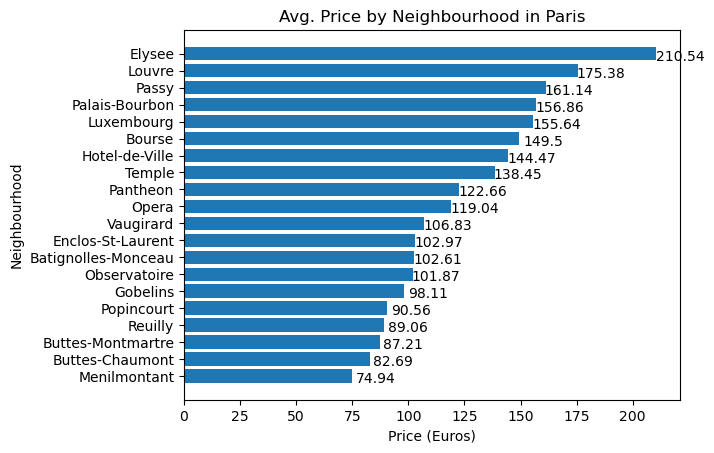

In [128]:
bars = plt.barh(paris_listings_neighbourhood['neighbourhood'],paris_listings_neighbourhood['price'])
for bar in bars:
    plt.text(bar.get_width() + paris_listings_neighbourhood['price'].max() * 0.05,bar.get_y(),round(bar.get_width(),2),ha='center')
plt.title('Avg. Price by Neighbourhood in Paris')
plt.xlabel('Price (Euros)')
plt.ylabel('Neighbourhood')
plt.show()

#### 2. Avg Price by 'Accomodates' in the most expensive neighbourhood in Paris ####

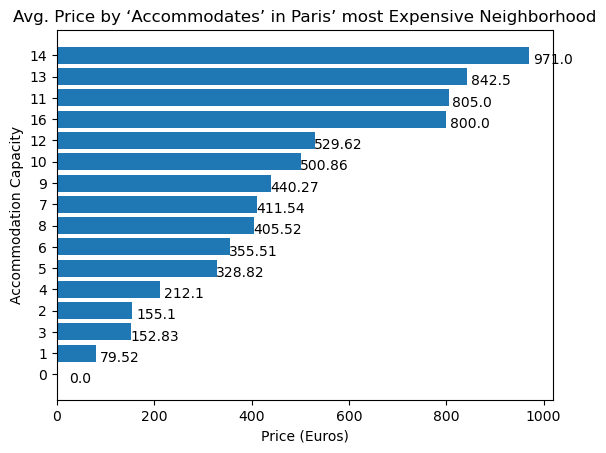

In [129]:
bars = plt.barh(paris_listings_accomodations['accommodates'].astype(str),paris_listings_accomodations['price'])
#Added .astype(str) to force y axis to use actual values instead of automatic scaling of 2.5(int)
for bar in bars:
    plt.text(bar.get_width() + paris_listings_accomodations['price'].max()*0.05 , bar.get_y(), round(bar.get_width(),2),ha='center')
plt.title('Avg. Price by ‘Accommodates’ in Paris’ most Expensive Neighborhood')
plt.xlabel('Price (Euros)')
plt.ylabel('Accommodation Capacity')
plt.show()

#### 3. Avg Price and No of new AirBnB hosts in Paris over time ####

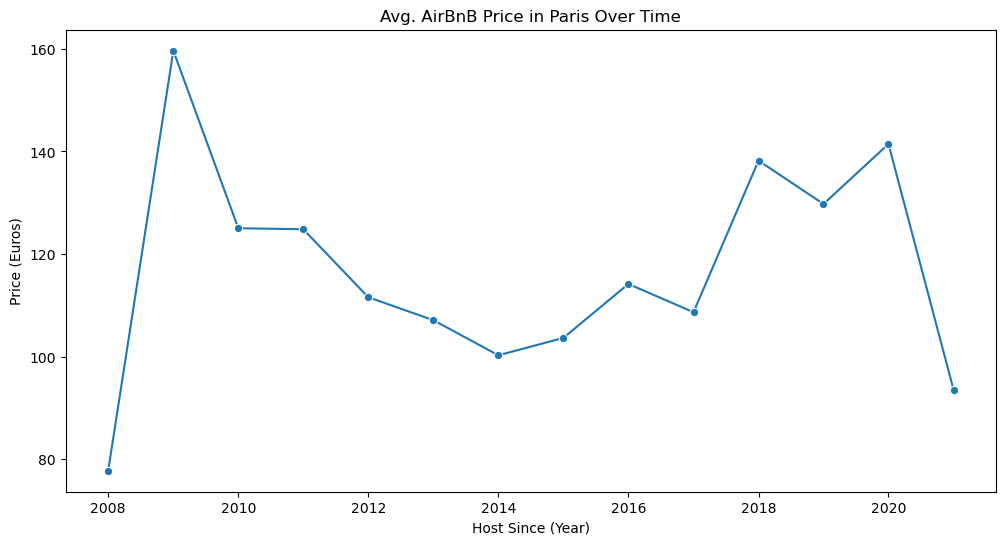

In [104]:
sns.lineplot(data=paris_listings_over_time,x='host_since',y='price',marker='o')
plt.title('Avg. AirBnB Price in Paris Over Time')
plt.xlabel('Host Since (Year)')
plt.ylabel('Price (Euros)')
plt.show()

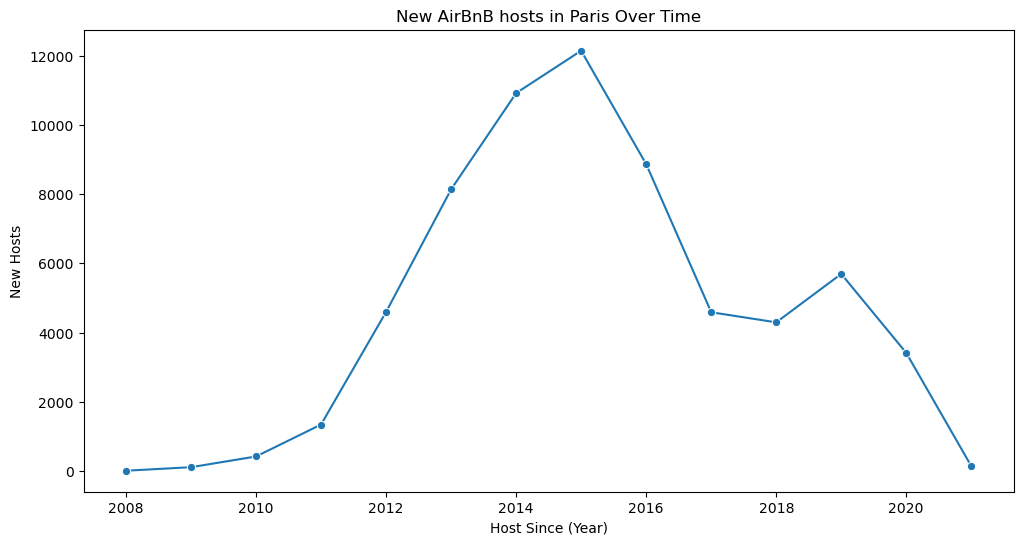

In [109]:
sns.lineplot(data=paris_listings_over_time,x='host_since',y='No_Of_New_Hosts',marker='o')
plt.title('New AirBnB hosts in Paris Over Time')
plt.xlabel('Host Since (Year)')
plt.ylabel('New Hosts')
plt.show()

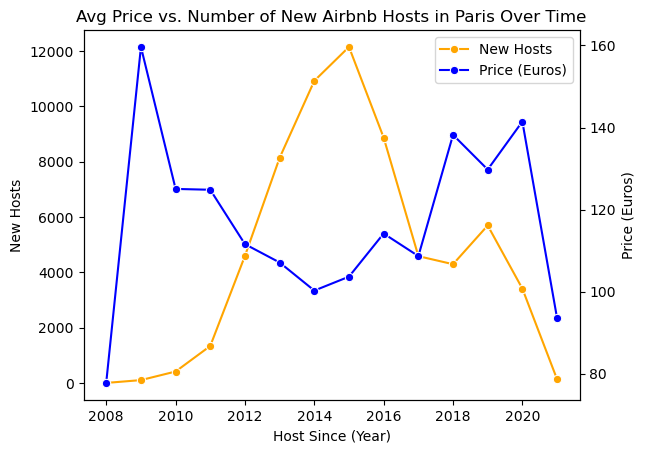

In [123]:
fig, ax1 = plt.subplots()
line1 = sns.lineplot(data=paris_listings_over_time,x='host_since',y='No_Of_New_Hosts',marker='o',color = 'orange',label = 'New Hosts',ax=ax1, legend=False)
#legend = False --> hides default legend
ax1.set_xlabel('Host Since (Year)')
ax1.set_ylabel('New Hosts')

ax2 = ax1.twinx()
line2 = sns.lineplot(data=paris_listings_over_time,x='host_since',y='price',marker='o',color = 'Blue',label = 'Price (Euros)',ax=ax2,legend=False)
ax2.set_ylabel('Price (Euros)')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Avg Price vs. Number of New Airbnb Hosts in Paris Over Time')
plt.show()